In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sd
from sklearn.cluster import AgglomerativeClustering    # agens 算法
from sklearn.neighbors import kneighbors_graph    # KNN 近邻计算

In [2]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

#### 创建模拟数据集

In [3]:
# 生成1000条数据
N = 1000
centers = [(-1, 1), (1, 1), (1, -1), (-1, 1)]
n_cluster = len(centers)
X1, Y1 = sd.make_blobs(n_samples=N, n_features=2,
                       centers=centers, cluster_std=0.8, random_state=9)

# 噪音数据
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)     # 生成一个在0-1区间内均匀分布的2维矩阵样本
min1, min2 = np.min(X1, axis=0)    # axis取0返回每列的最小值，1，每行，None 所有值的最小值
max1, max2 = np.max(X1, axis=0)    # 同上
# 对噪音数据按照一定比例进行缩放
r[:, 0] = r[:, 0] * (max1 - min1) + min1
r[:, 1] = r[:, 1] * (max2 - min2) + min2

X1_noise = np.concatenate((X1, r), axis=0)
Y1_noise = np.concatenate((Y1, [4]*n_noise))

In [4]:
# 生成两簇月牙状数据
X2, Y2 = sd.make_moons(n_samples=N, noise=0.05)
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)     # 生成一个在0-1区间内均匀分布的2维矩阵样本
min1, min2 = np.min(X2, axis=0)    # axis取0返回每列的最小值，1，每行，None 所有值的最小值
max1, max2 = np.max(X2, axis=0)    # 同上
# 对噪音数据按照一定比例进行缩放
r[:, 0] = r[:, 0] * (max1 - min1) + min1
r[:, 1] = r[:, 1] * (max2 - min2) + min2

X2_noise = np.concatenate((X2, r), axis=0)
Y2_noise = np.concatenate((Y2, [4]*n_noise))

In [5]:
# 寻找边界
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

#### 画图

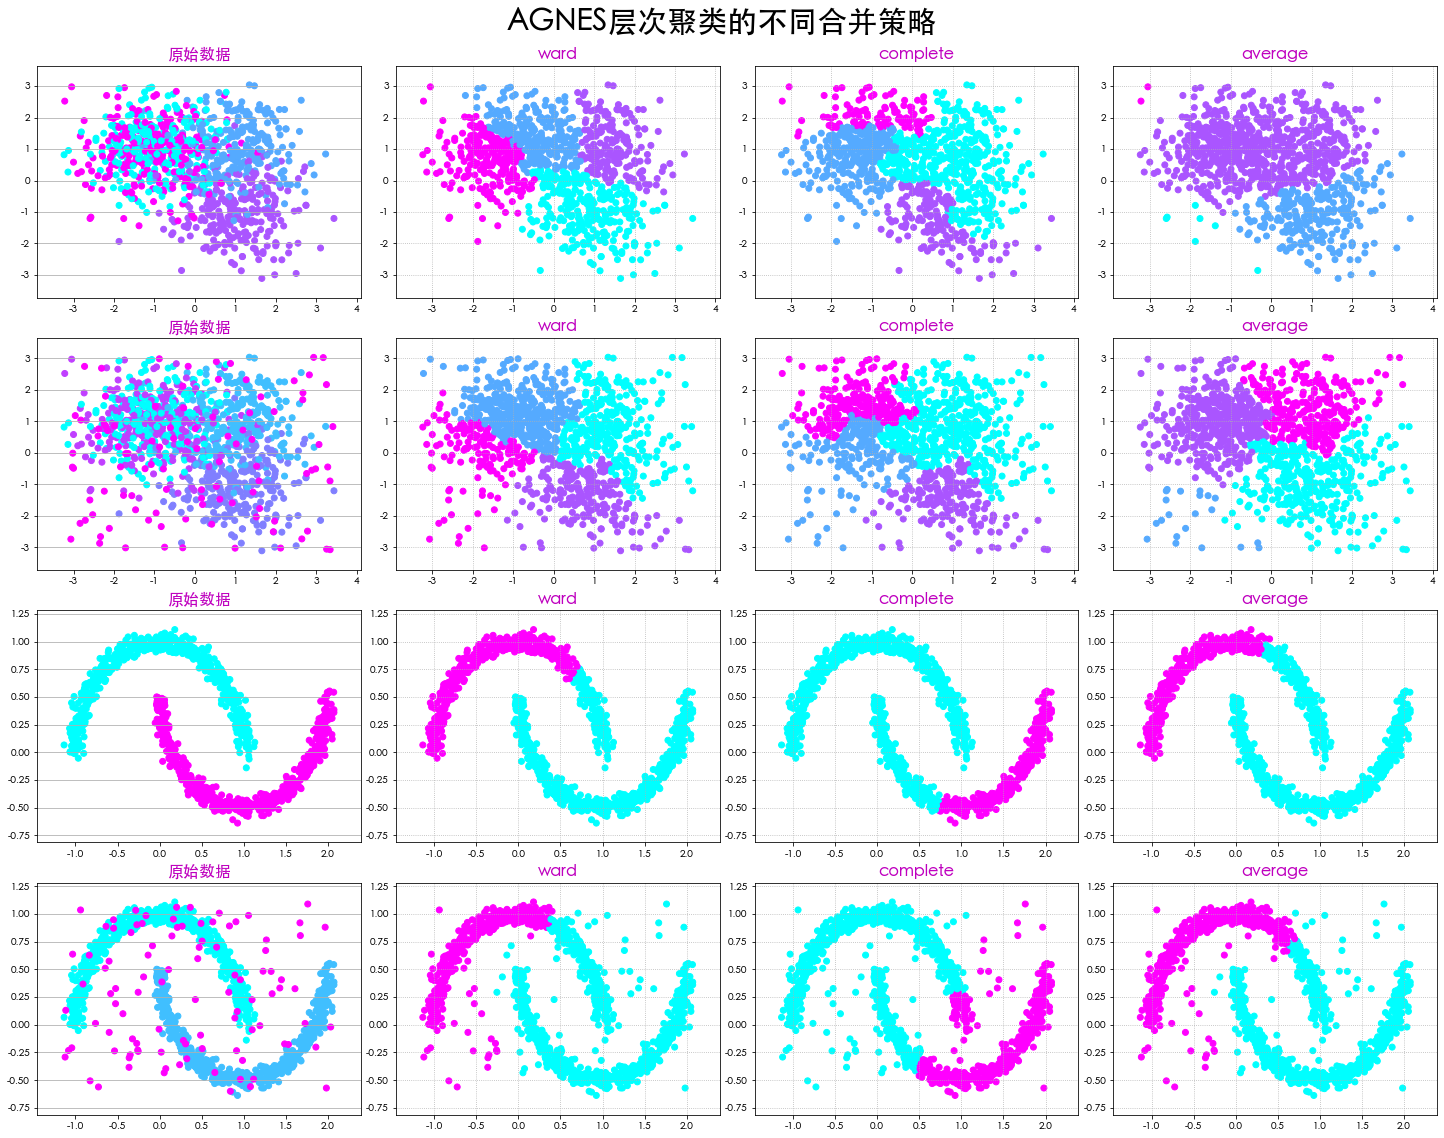

In [6]:
plt.figure(facecolor='w', figsize=(20, 16))
linkages = ('ward', 'complete', 'average')
# 以下数据分别代表 簇数，样本，样本标签
datasets = ((4, X1, Y1), (4, X1_noise, Y1_noise),
            (2, X2, Y2), (2, X2_noise, Y2_noise))

for idx, (n_cluster, x, y) in enumerate(datasets):
    # 绘制原始数据
    plt.subplot(4, 4, 4*idx + 1)    # 每行的第一个图是原始数据图
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='cool')
    plt.title(u'原始数据', fontsize=16, color='m')
    plt.grid(True, axis='y')
    min1, min2 = np.min(x, axis=0)
    max1, max2 = np.max(x, axis=0)
    plt.xlim(expandBorder(min1, max1))
    plt.ylim(expandBorder(min2, max2))

    # 计算类别与类别间的距离，计算最近的7个样本间的距离
    # 希望在agens算法中，在计算过程中不需要重复性的计算点与点之间的
    connectivity = kneighbors_graph(X1, n_neighbors=7, mode='distance',
                                    metric='minkowski', p=2, include_self=True)
    connectivity = (connectivity + connectivity.T)
    for i, linkage in enumerate(linkages):
        # 构建模型
        agens = AgglomerativeClustering(
            n_clusters=n_cluster, affinity='euclidean', 
            connectivity=None, linkage=linkage)
        agens.fit(x)    # 训练数据
        
        y_pre = agens.labels_
        plt.subplot(4, 4, i+2+4*idx)
        plt.scatter(x[:, 0], x[:, 1], c=y_pre, cmap='cool')
        plt.title(linkage, fontsize=16, color='m')
        plt.grid(b=True, ls=':')
        plt.xlim(expandBorder(min1, max1))
        plt.ylim(expandBorder(min2, max2))
        
plt.suptitle(u'AGNES层次聚类的不同合并策略', fontsize=30)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
plt.show()
        

plt.show()

In [7]:
connectivity = kneighbors_graph(X1, n_neighbors=7, mode='distance', 
                               metric='minkowski', p=2, include_self=True)

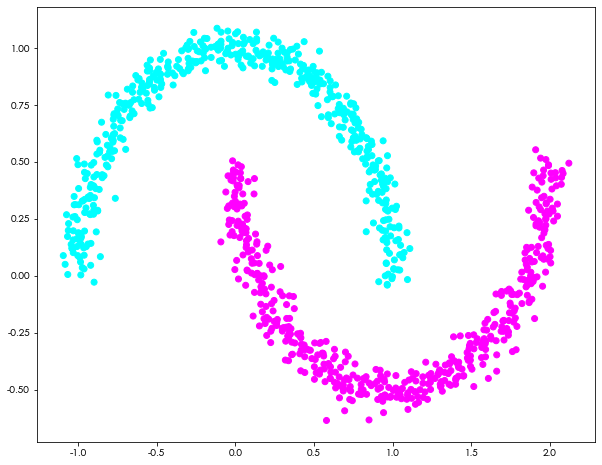

In [24]:
plt.figure(facecolor='w', figsize=(10, 8))
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap='cool')
plt.show()